In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib notebook

In [2]:
def plot_decision_region(X, y, classifier, test_idx=None, resolution=0.2):
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    markers = ('s', 'x', 'o', '^', 'v')
    
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    """
    Plot the decision surface region
    """
    
    x1_min, x1_max = X[:,0].min(), X[:,0].max()
    x2_min, x2_max = X[:,1].min(), X[:,1].max()
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([np.ravel(xx1), np.ravel(xx2)]).T)
    Z = Z.reshape(xx1.shape)
    _ = plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    _ = plt.xlim(xx1.min(), xx1.max())
    _ = plt.ylim(xx2.min(), xx2.max())
    
    """
    Plot sample points
    """
    X_test, y_test = X[test_idx, 0], y[test_idx]
    for idx, c1 in enumerate(np.unique(y)):
        _ = plt.scatter(x=X[y==c1, 0], y=X[y==c1, 1], marker=markers[idx], c=cmap(idx), label=c1)
    
    """
    Highlight test points
    """
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='gray', alpha=0.8, linewidth=1, marker='o', s=55, label='test set')

In [3]:
from sklearn.svm import SVC

In [4]:
svm = SVC(C=1.0, kernel='linear', random_state=0)

In [5]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [8]:
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined_std = np.hstack((y_train, y_test))

<IPython.core.display.Javascript object>


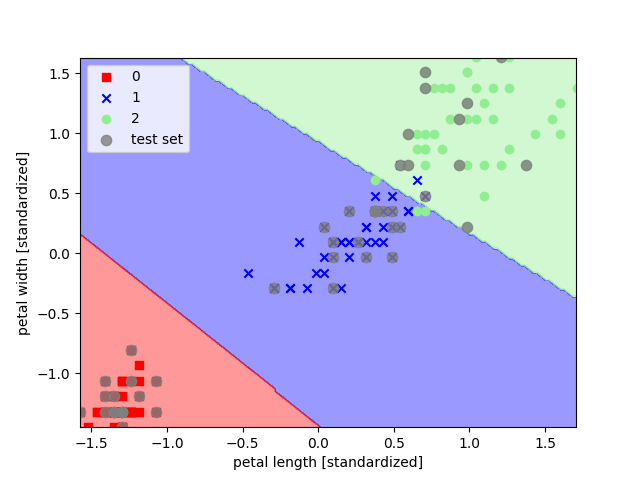

In [10]:
plot_decision_region(X=X_combined_std, y=y_combined_std, classifier=svm, test_idx=range(105,150), resolution=0.02)
_ = plt.xlabel('petal length [standardized]')
_ = plt.ylabel('petal width [standardized]')
_ = plt.legend()

In [11]:
from sklearn.metrics import accuracy_score
y_pred = svm.predict(X_test_std)
print("Accuracy: %.3f" %(accuracy_score(y_test, y_pred)*100))

Accuracy: 97.778


### Non-linear Kernel SVM

In [12]:
np.random.seed(0)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0] > 0, X_xor[:,1] > 0)
y_xor = np.where(y_xor, 1, -1)

<IPython.core.display.Javascript object>


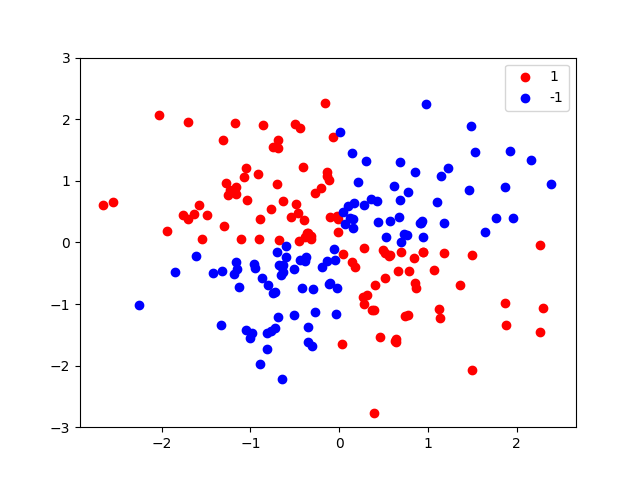

In [13]:
_ = plt.scatter(X_xor[y_xor==1,0], X_xor[y_xor==1,1], marker='o', color='red', label='1')
_ = plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1,1], marker='o', color='blue', label='-1')
_ = plt.legend()
_ = plt.ylim(-3, 3)

In [16]:
svm_rbf = SVC(C=10.0, kernel='rbf', gamma=0.10, random_state=0)
svm_rbf.fit(X_xor, y_xor)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

<IPython.core.display.Javascript object>


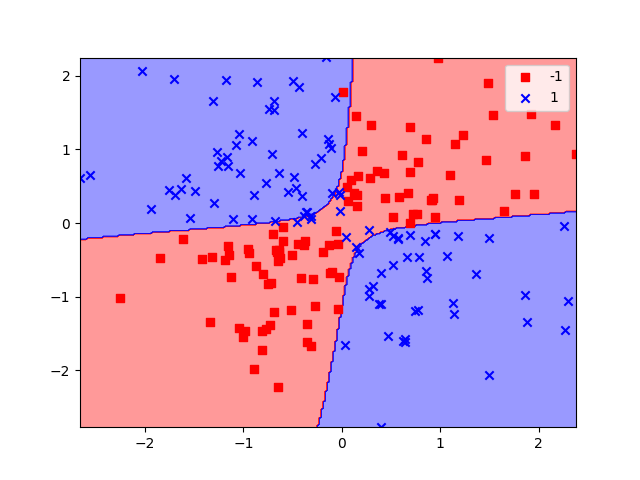

In [17]:
_ = plot_decision_region(X_xor, y_xor, classifier=svm_rbf, resolution=0.02)
_ = plt.legend()

#### Effect of changing values for gamma

In [19]:
svm_iris = SVC(C=1.0, gamma=0.2, random_state=0, kernel='rbf')
svm_iris.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

<IPython.core.display.Javascript object>


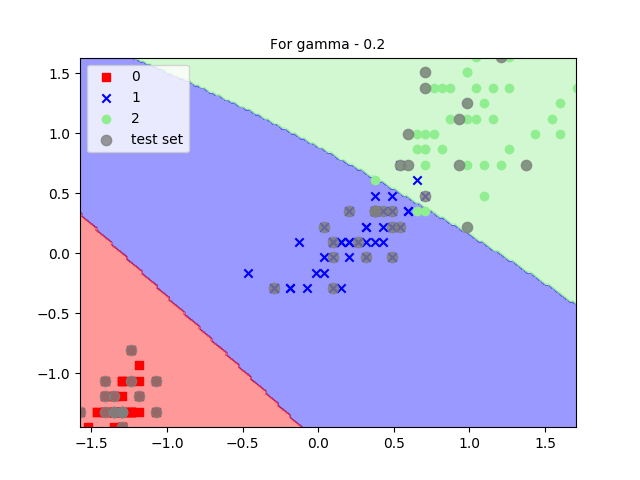

In [23]:
_ = plot_decision_region(X_combined_std, y_combined_std, classifier=svm_iris, resolution=0.02, test_idx=range(105,150))
_ = plt.legend()
_ = plt.title('For gamma - 0.2', fontsize=10)

<IPython.core.display.Javascript object>


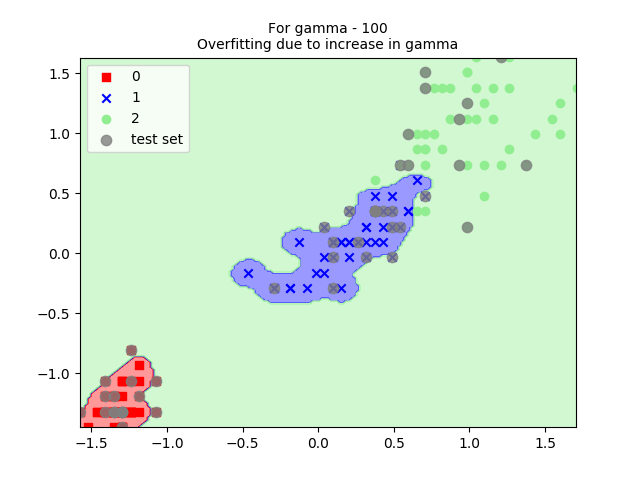

In [24]:
svm_iris2 = SVC(C=1.0, gamma=100.0, kernel='rbf', random_state=0)
svm_iris2.fit(X_train_std, y_train)

_ = plot_decision_region(X_combined_std, y_combined_std, test_idx=range(105,150), resolution=0.02, classifier=svm_iris2)
_ = plt.title("For gamma - 100\nOverfitting due to increase in gamma", fontsize=10)
_ = plt.legend()